# Multiple Linear Regression

Here's a  dataset perfect for multiple linear regression analysis, featuring **3 predictor variables (study hours, sleep quality, and practice exams)** and **1 target variable (final exam score)**:

In [1]:
#Import necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Read the dataset
df = pd.read_csv('1_2_multiple_linear_final_exam_score.csv')
df.head()

,study_hours,sleep_quality,practice_exams,final_score
0,2,6,1,52
1,3,5,0,48
2,4,7,2,65
3,5,6,3,70
4,6,8,2,75


In [3]:
#describe the dataset and get information about it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   study_hours     30 non-null     int64
 1   sleep_quality   30 non-null     int64
 2   practice_exams  30 non-null     int64
 3   final_score     30 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB


np.int64(0)

In [4]:
df.describe()

,study_hours,sleep_quality,practice_exams,final_score
count,30.000000,30.000000,30.000000,30.000000
mean,9.900000,7.166667,4.333333,78.400000
std,5.060666,1.662639,2.795727,17.197835
min,2.000000,3.000000,0.000000,40.000000
25%,6.000000,6.000000,2.000000,68.500000
50%,9.500000,7.000000,4.000000,85.500000
75%,13.000000,8.000000,6.000000,91.750000
max,20.000000,10.000000,10.000000,99.000000


**Meaningful Predictors:**

<b>study_hours</b>: Continuous (1-20 hours)

<b>sleep_quality</b>: Ordinal (1-10 scale, 10=best)

<b>practice_exams</b>: Discrete count (0-10 exams)

In [7]:
# Controlling for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 study_hours       0
sleep_quality     0
practice_exams    0
final_score       0
dtype: int64


In [7]:
df.corr()

,study_hours,sleep_quality,practice_exams,final_score
study_hours,1.000000,0.686454,0.950526,0.855091
sleep_quality,0.686454,1.000000,0.662709,0.876728
practice_exams,0.950526,0.662709,1.000000,0.875687
final_score,0.855091,0.876728,0.875687,1.000000


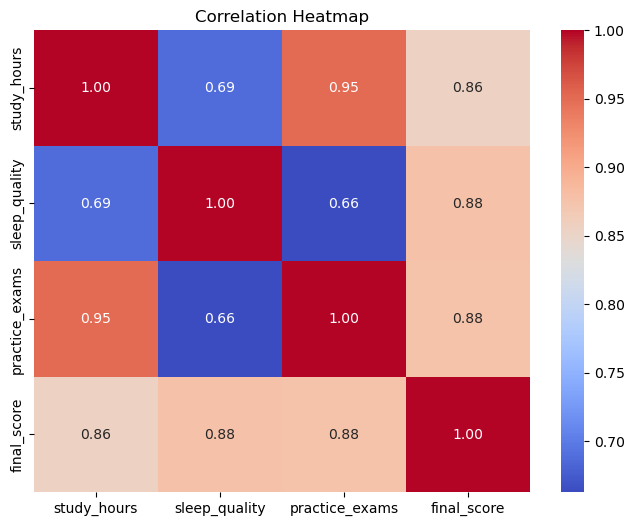

In [11]:
# see the correlation between variables
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

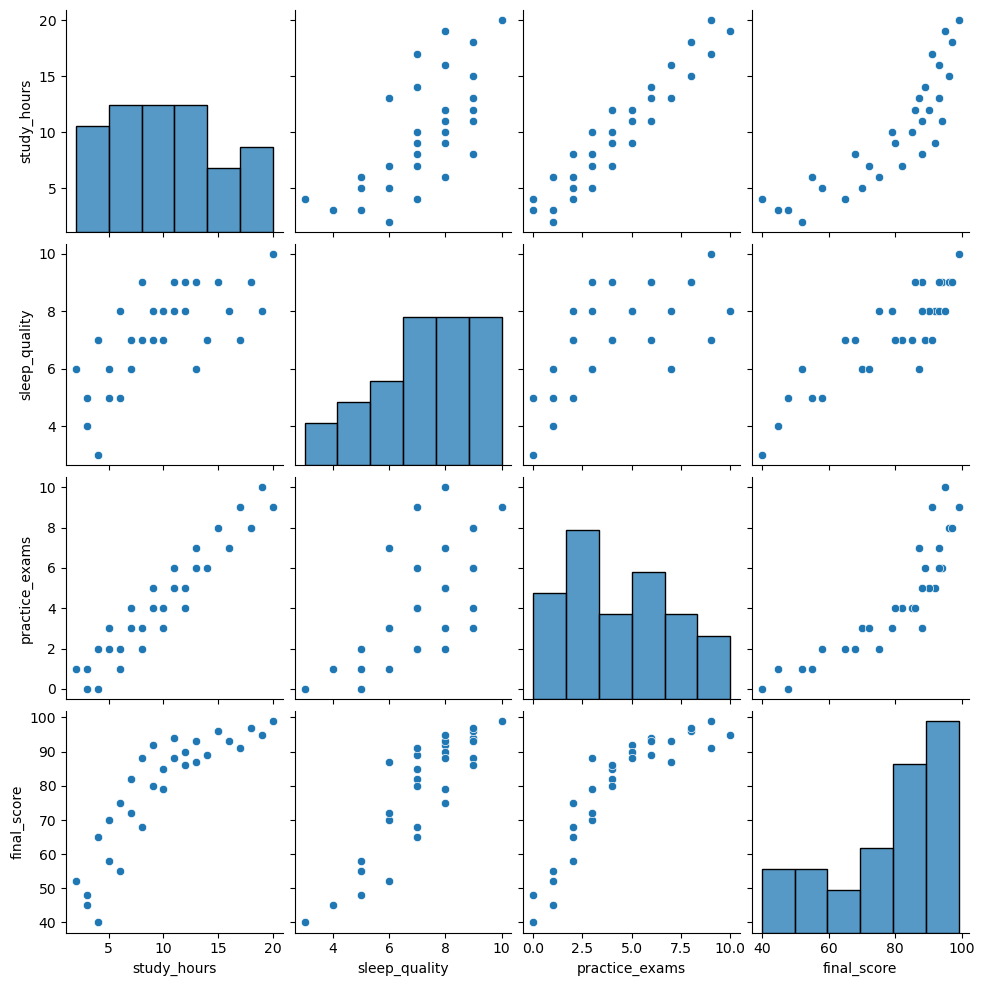

In [12]:
# see the relationship with pairplot
sns.pairplot(df)
plt.show()

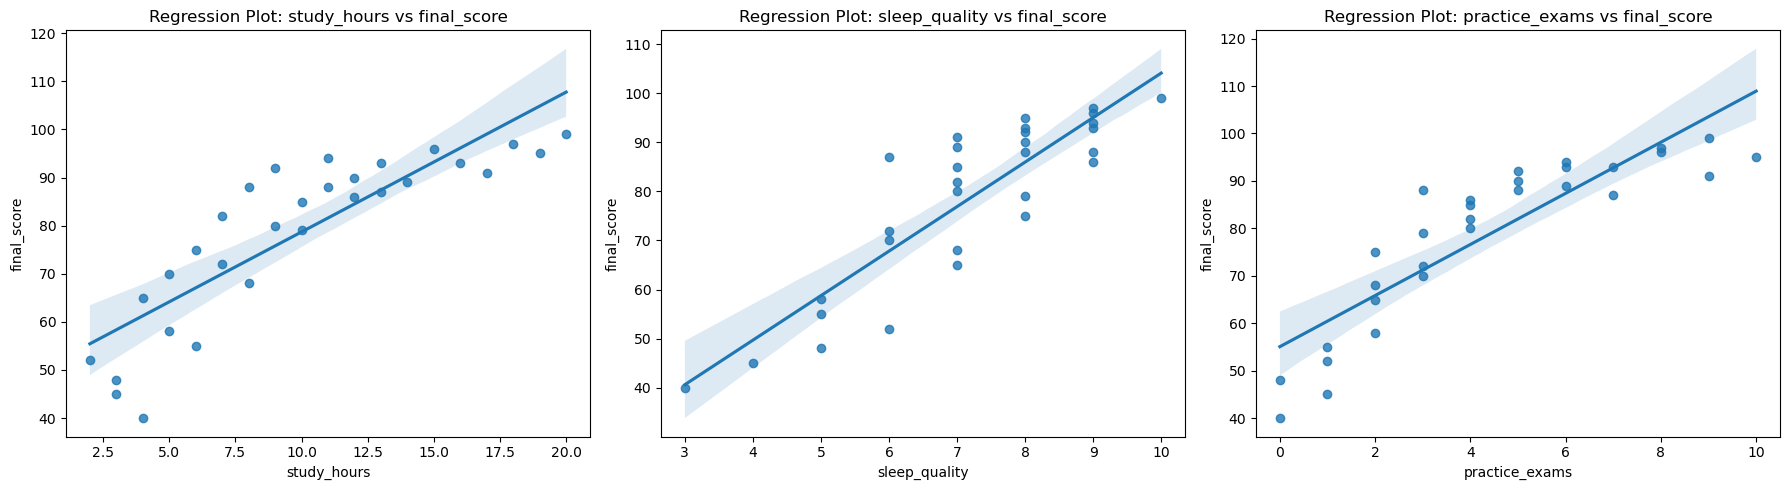

In [13]:
# see the regression plot between each predictor and the target variable
plt.figure(figsize=(18, 5))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(1, df.shape[1]-1, i+1)
    sns.regplot(x=col, y=df.columns[-1], data=df)
    plt.title(f"Regression Plot: {col} vs {df.columns[-1]}")
plt.tight_layout()
plt.show()

In [9]:
# %% [4. Data Preparation]
# Define features and target variable
# X = df.iloc[:, :-1]  # All columns except the last one
# y = df.iloc[:, -1]   # Only the last column

# another alternative for defining X and y
X = df.drop('final_score', axis=1)
y = df['final_score']

In [10]:
print("Features (X):\n", X.head())
print("Target (y):\n", y.head())

Features (X):
    study_hours  sleep_quality  practice_exams
0            2              6               1
1            3              5               0
2            4              7               2
3            5              6               3
4            6              8               2
Target (y):
 0    52
1    48
2    65
3    70
4    75
Name: final_score, dtype: int64


In [11]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 24 samples
Testing set size: 6 samples


In [12]:
# Scale the features (optional but recommended for better performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled Features (X_train_scaled):\n", X_train_scaled[:5])
print("---")
print("Scaled Features (X_test_scaled):\n", X_test_scaled[:5])

Scaled Features (X_train_scaled):
 [[ 0.15940517  0.54226585 -0.35520853]
 [ 0.76346688  1.10810847  0.8072921 ]
 [ 0.96482078 -0.02357678  0.8072921 ]
 [-1.45142605 -0.5894194  -1.13020895]
 [-0.64601044  0.54226585 -0.74270874]]
---
Scaled Features (X_test_scaled):
 [[-0.24330263 -0.02357678 -0.74270874]
 [ 1.56888249 -0.02357678  1.96979274]
 [ 0.36075908  0.54226585  0.41979189]
 [ 1.9715903   0.54226585  2.35729295]
 [ 0.15940517 -0.02357678  0.03229168]]


In [13]:
# create and train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [14]:
# make predictions
y_pred = model.predict(X_test_scaled)

In [15]:
# calculate slope (coefficients) and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (Slope):", coefficients)
print("Intercept:", intercept)


Coefficients (Slope): [-2.07171458  9.05430463 11.36433647]
Intercept: 76.29166666666667


In [16]:
# Performance Evaluation and Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 30.716758724967168
Mean Absolute Error (MAE): 4.2788725170719415
R-squared (R2): 0.6275502478616308


In [36]:
# make prediction for a new student
new_student = np.array([[2, 1, 1]])  #study_hours,sleep_quality,practice_exams
new_student_scaled = scaler.transform(new_student)
predicted_score = model.predict(new_student_scaled)

print(f"Predicted Final Exam Score for the new student: {predicted_score[0]:.2f}")

Predicted Final Exam Score for the new student: 92.57


###END